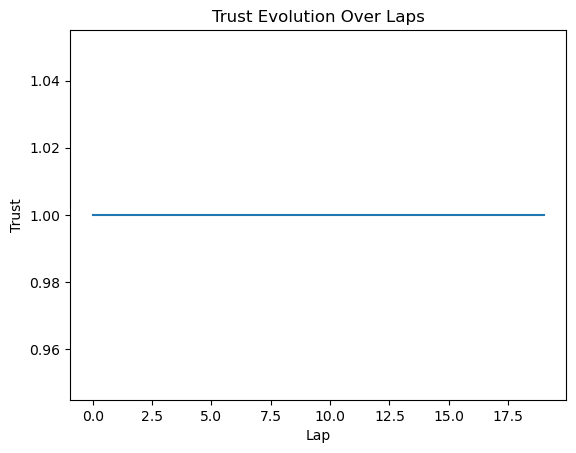

<Figure size 640x480 with 0 Axes>

In [3]:
class Ccooperate:
    def __init__(self):
        self.last_opponent_action = 'cooperate'
    def act(self):
        return self.last_opponent_action
    def observe(self, opponent_action):
        self.last_opponent_action = opponent_action

class SimpleRaceEnv:
    def __init__(self, agent1, agent2, laps=20):
        self.agent1 = agent1
        self.agent2 = agent2
        self.laps = laps
        self.trust_history = []
    def run(self):
        a1_action, a2_action = 'cooperate', 'cooperate'
        for _ in range(self.laps):
            self.agent1.observe(a2_action)
            self.agent2.observe(a1_action)
            a1_action = self.agent1.act()
            a2_action = self.agent2.act()
            trust = 1 if a1_action == a2_action == 'cooperate' else 0
            self.trust_history.append(trust)
        return self.trust_history

import matplotlib.pyplot as plt
env = SimpleRaceEnv(Ccooperate(), Ccooperate())
trust = env.run()
plt.plot(trust)
plt.title("Trust Evolution Over Laps")
plt.xlabel("Lap")
plt.ylabel("Trust")
plt.show()
plt.savefig('trust_evolution_graph.png')
